In [2]:
import pandas as pd
import math

# Create a DataFrame from the provided data
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'Income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'Student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'Credit_Rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'Buys_Computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'n']
}

df = pd.DataFrame(data)

# Calculate the entropy of a given set of labels
def entropy(labels):
    total_samples = len(labels)
    if total_samples == 0:
        return 0
    counts = labels.value_counts()
    entropy = 0
    for count in counts:
        prob = count / total_samples
        entropy -= prob * math.log2(prob)
    return entropy

# Calculate Information Gain for a feature
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_values = data[feature].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return total_entropy - weighted_entropy

# Calculate Information Gain for each feature
target_feature = 'Buys_Computer'
information_gains = {}
for feature in df.columns:
    if feature != target_feature:
        ig = information_gain(df, feature, target_feature)
        information_gains[feature] = ig

# Find the feature with the highest Information Gain
root_node = max(information_gains, key=information_gains.get)
root_entropy = entropy(df[target_feature])

# Print the Information Gain for each feature
print("Information Gains:")
for feature, ig in information_gains.items():
    print(f"{feature}: {ig}")

# Print the root node and its entropy
print(f"Root Node: {root_node}")
print(f"Root Entropy: {root_entropy}")


Information Gains:
Age: 0.3617241393770686
Income: 0.14419688526158425
Student: 0.17787321397664724
Credit_Rating: 0.10918081414207981
Root Node: Age
Root Entropy: 1.1981174211304033


In [5]:
#A2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split the data into features (X) and target (y)
X = df.drop('Buys_Computer', axis=1)
y = df['Buys_Computer']

# Define categorical columns
categorical_columns = ['Age', 'Income', 'Student', 'Credit_Rating']

# Create a column transformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a Decision Tree Classifier as part of a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the model on the training data
model.fit(X, y)

# Calculate the depth of the constructed tree
tree_depth = model.named_steps['classifier'].get_depth()

# Print the depth of the tree
print(f"Tree Depth: {tree_depth}")

Tree Depth: 4


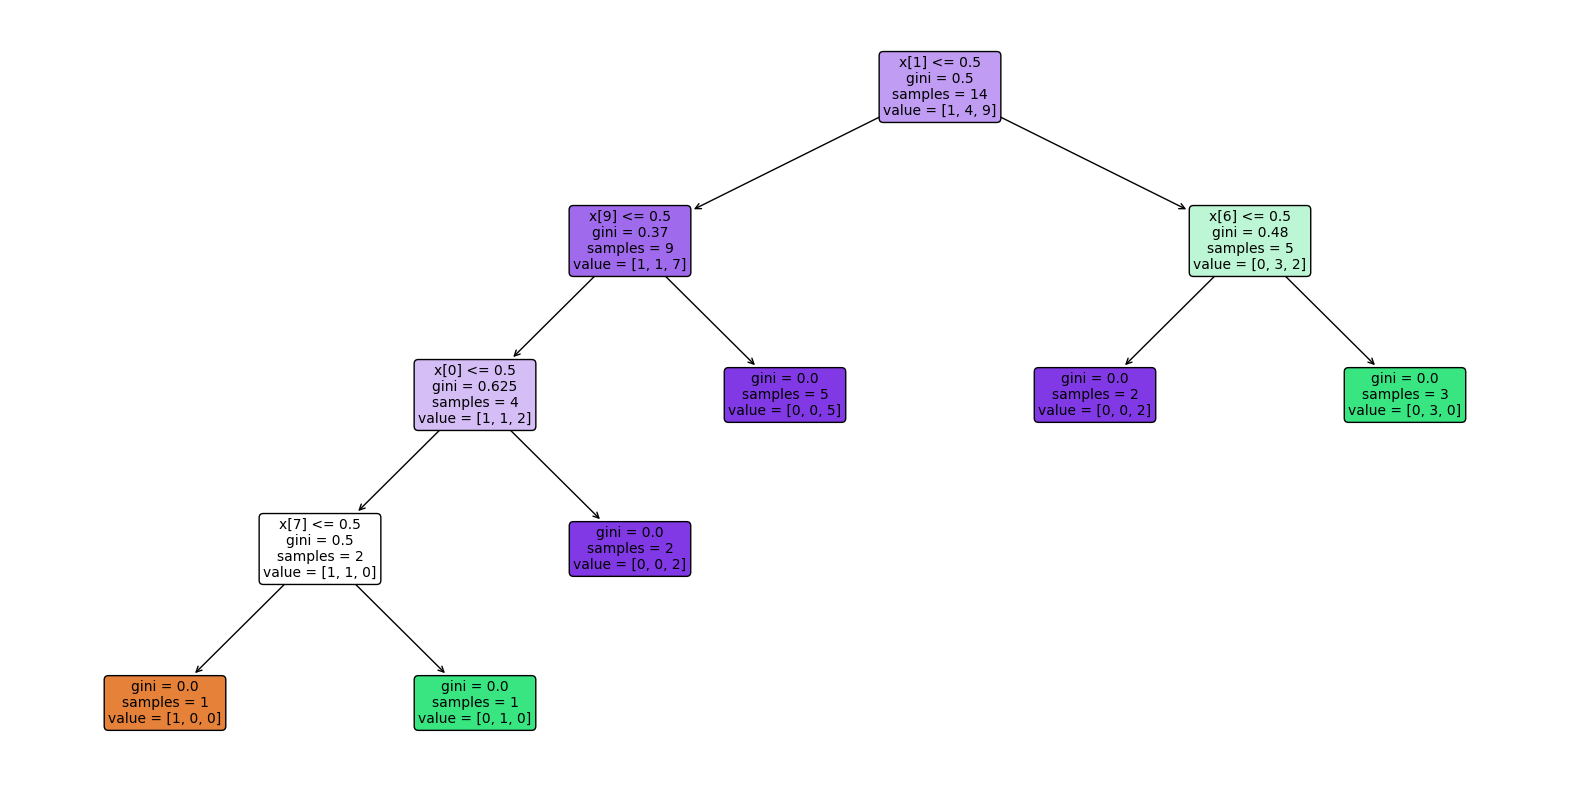

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Set the figure size for the plot
plt.figure(figsize=(20,10))  # Adjust the figure size as needed

# Use plot_tree to visualize the decision tree
plot_tree(
    model.named_steps['classifier'],  # Access the DecisionTreeClassifier from the pipeline
    filled=True,                      # Fill nodes with colors
    rounded=True,                     # Round the box shapes
    fontsize=10                       # Font size for text in the plot
)

# Display the plot
plt.show()


Training Set Accuracy: 1.00
Test Set Accuracy: 1.00


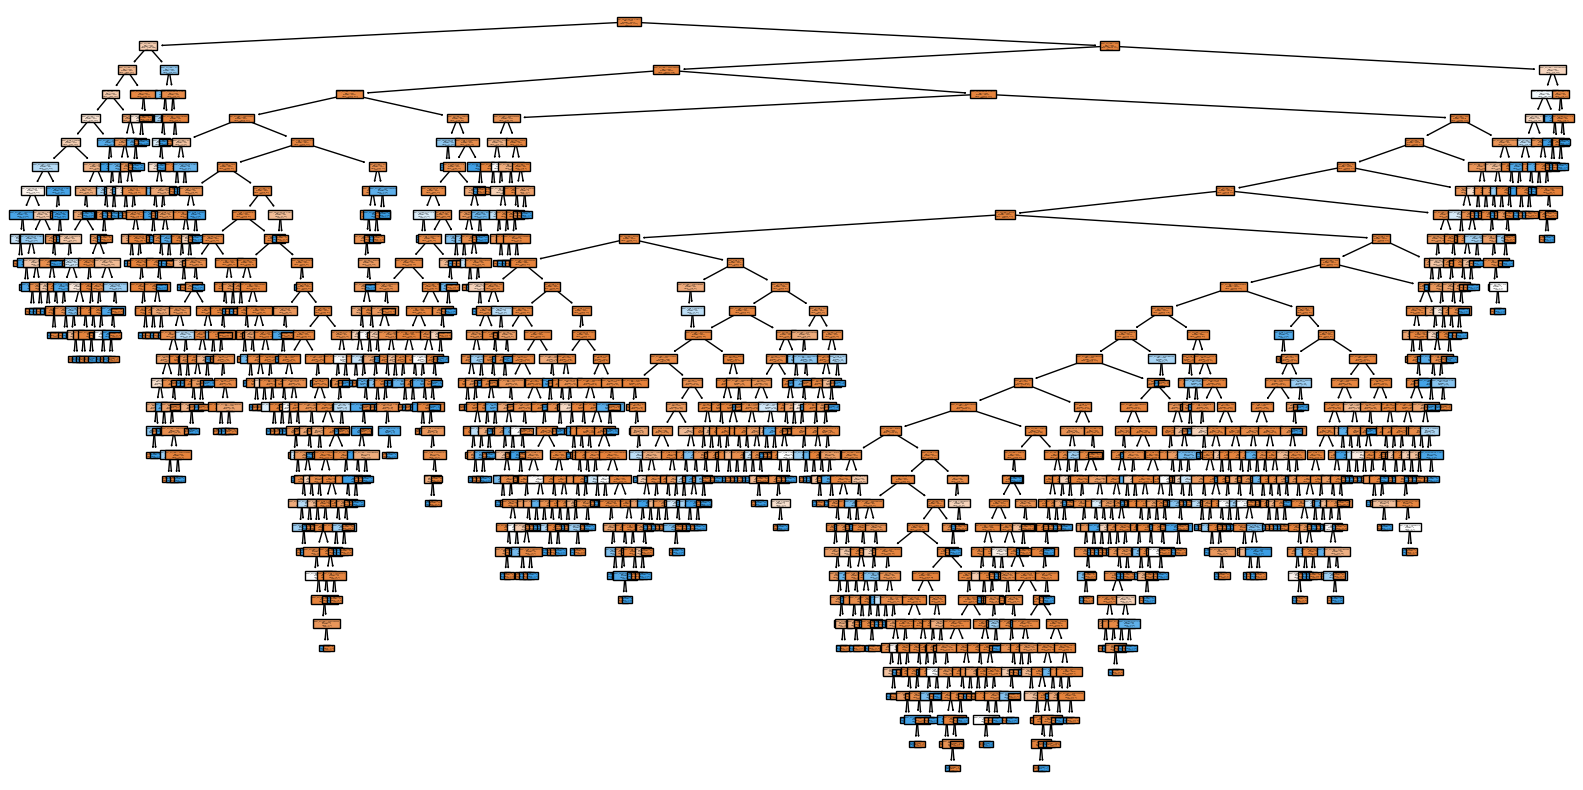

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree from sklearn.tree
import matplotlib.pyplot as plt

file_path = 'hdddata.csv'


df = pd.read_csv(file_path)

X = df.drop('failure', axis=1)
y = df['failure']

# Split the data into training and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()
from sklearn.impute import SimpleImputer

# Replace NaN values with the mean of each column (you can change 'mean' to 'median' or 'most_frequent' if needed)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Decision Tree Classifier as before using X_train_imputed and y_train
# Then, evaluate the model's accuracy on X_test_imputed and y_test
X_train = X_train_imputed
X_test = X_test_imputed


# Fit the model on the training data
model.fit(X_train, y_train)

# Calculate accuracy on the training data
train_accuracy = model.score(X_train, y_train)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on the test data
test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()])
plt.show()


Training Set Accuracy (with max_depth): 0.97
Test Set Accuracy (with max_depth): 0.97


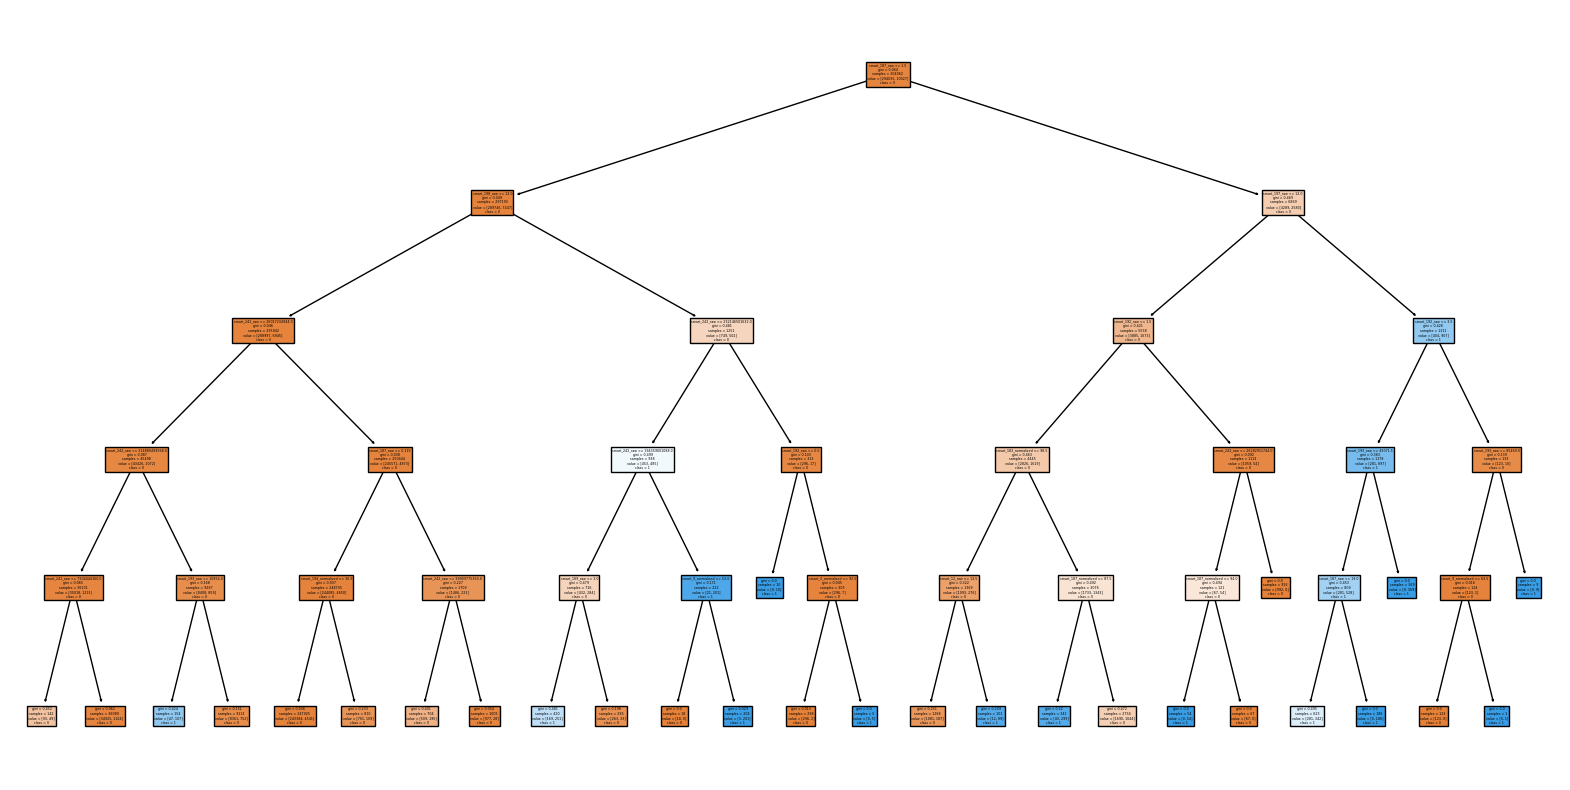

In [15]:
# Create a Decision Tree Classifier with max_depth constraint (e.g., max_depth=5)
model = DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
model.fit(X_train_imputed, y_train)  # Use X_train_imputed from previous code

# Calculate accuracy on the training data
train_accuracy_with_max_depth = model.score(X_train_imputed, y_train)
print(f"Training Set Accuracy (with max_depth): {train_accuracy_with_max_depth:.2f}")

# Calculate accuracy on the test data
test_accuracy_with_max_depth = model.score(X_test_imputed, y_test)  # Use X_test_imputed from previous code
print(f"Test Set Accuracy (with max_depth): {test_accuracy_with_max_depth:.2f}")

# Plot the Decision Tree with the max_depth constraint
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()])
plt.show()


Training Set Accuracy (with Entropy criterion): 0.97
Test Set Accuracy (with Entropy criterion): 0.97


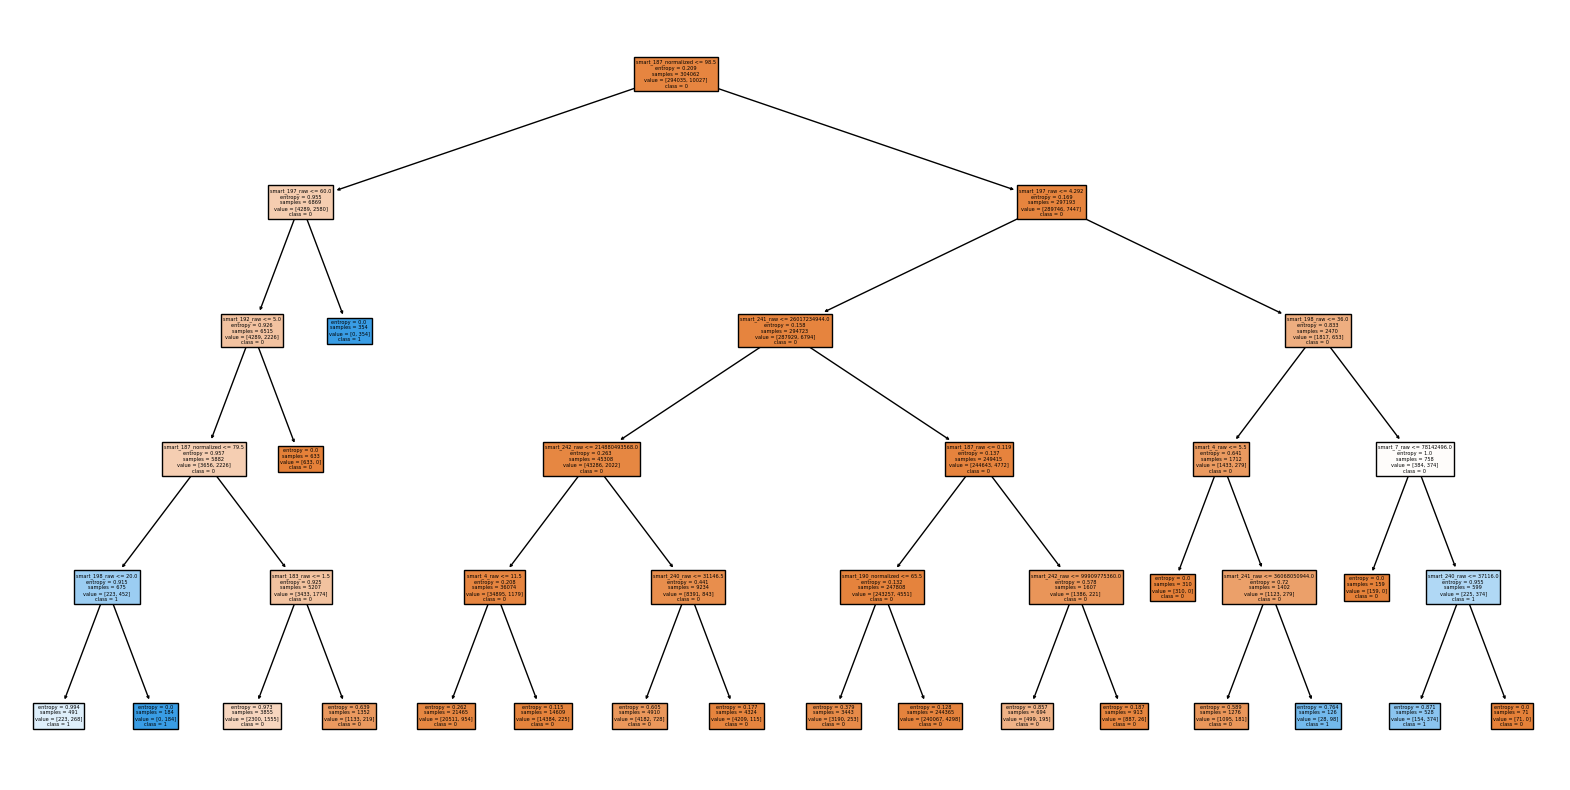

In [16]:
#A6
# Create a Decision Tree Classifier with the "Entropy" criterion
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Fit the model with the "Entropy" criterion on the training data
model_entropy.fit(X_train_imputed, y_train)  # Use X_train_imputed from previous code

# Calculate accuracy on the training data with "Entropy" criterion
train_accuracy_entropy = model_entropy.score(X_train_imputed, y_train)
print(f"Training Set Accuracy (with Entropy criterion): {train_accuracy_entropy:.2f}")

# Calculate accuracy on the test data with "Entropy" criterion
test_accuracy_entropy = model_entropy.score(X_test_imputed, y_test)  # Use X_test_imputed from previous code
print(f"Test Set Accuracy (with Entropy criterion): {test_accuracy_entropy:.2f}")

# Plot the Decision Tree with "Entropy" criterion
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()])
plt.show()
